In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

## Data Loading

In [0]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-04-09 11:29:59--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-04-09 11:29:59 (41.8 MB/s) - ‘moore.csv’ saved [2302/2302]



In [0]:
!ls

moore.csv  sample_data


In [0]:
data = pd.read_csv('moore.csv',header=None).values
X = data[:,0].reshape(-1,1)
Y = data[:,1]

In [0]:
X.shape

(162, 1)

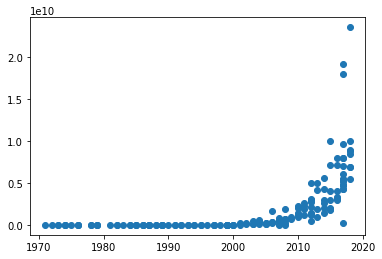

In [0]:
plt.scatter(X,Y)

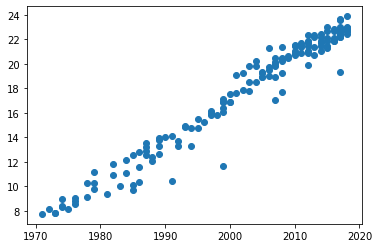

In [0]:
Y = np.log(Y)
plt.scatter(X,Y)

In [0]:
X = X - X.mean() # Scaling the X values

## Model

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Input(shape=(1,)),
                             tf.keras.layers.Dense(1)
                            ])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss='mse')

In [0]:
# learning rate schedular
def schedule(epoch,lr):

  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [0]:
model.fit(X,Y,epochs=200,callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 689.1138 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 504.5771 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 463.9871 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 608.2693 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 235.2373 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 167.2854 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 138.5287 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 74.7766 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 58.5849 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 63.0043 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 

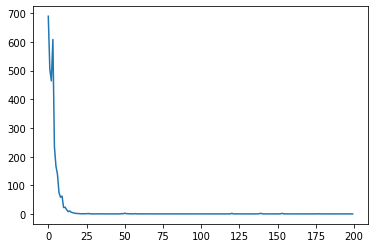

In [0]:
plt.plot(model.history.history['loss'],label='loss')

In [0]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.3365019]], dtype=float32), array([17.769588], dtype=float32)]


In [0]:
a = model.layers[0].get_weights()[0][0,0]
print('Time to double',np.log(2)/a)

Time to double 2.0598611419840536


## Model Predictions

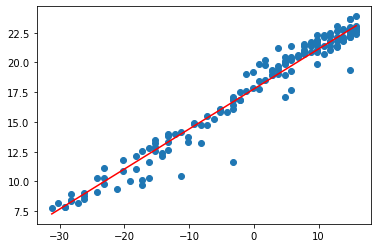

In [0]:
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,Yhat,'r')

In [0]:
# Manuel Calculation

w,b = model.layers[0].get_weights()
X = X.reshape(-1,1)
#(N,1) = (N,1)*(1,1) + (1)
Yhat2 = (X.dot(w)+b).flatten()

np.allclose(Yhat2,Yhat)

True